#  Gender Gap In College Degrees

The [Department of Education Statistics](nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women over the past 5 decades. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal [website](http://www.randalolson.com/blog/). This dataset can be used to visualize the gender gap in college degrees over the same time period.

## Aim

To visualize the growing gender gap in various college degrees over the past 5 decades. 

## Dataset

Dataset can be downloaded in the [link](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). The data set is broken up into 17 categories of degrees, with each column as a separate category. The columns in the dataset are a follows.

* Year
* Agriculture	
* Architecture
* Art and Performance 	
* Biology 
* Business 
* Communications and Journalism 
* Computer Science 
* Education 
* Engineering 
* English 
* Foreign Languages 
* Health Professions 
* Math and Statistics 
* Physical Sciences 
* Psychology 
* Public Administration 
* Social Sciences and History

Let's start our analysis by importing the libraries.

In [1]:
# importing libraries.

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# To avoid truncation of rows and columns in pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading the dataset for visualization.

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [4]:
# To display the first 5 rows in the dataset.

women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Data Cleaning

The dataset is already cleaned by Randal Olson and we only have to convert the column names to snakecase.

In [5]:
# To display the columns in the dataset.

women_degrees.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

In [6]:
# To rename the column names to snakecase.

women_degrees.columns = ['year', 'agriculture', 'architecture', 'art_and_performance', 'biology',
       'business', 'communications_and_journalism', 'computer_science',
       'education', 'engineering', 'english', 'foreign_languages',
       'health_professions', 'math_and_statistics', 'physical_sciences',
       'psychology', 'public_administration', 'social_sciences_and_history']
print(women_degrees.columns)

Index(['year', 'agriculture', 'architecture', 'art_and_performance', 'biology',
       'business', 'communications_and_journalism', 'computer_science',
       'education', 'engineering', 'english', 'foreign_languages',
       'health_professions', 'math_and_statistics', 'physical_sciences',
       'psychology', 'public_administration', 'social_sciences_and_history'],
      dtype='object')


## Data Visualization

Let's begin our analysis by first concentrating on STEM degrees. For this we will line plot the gender gap for each category of STEM degrees in women_degrees dataframe.

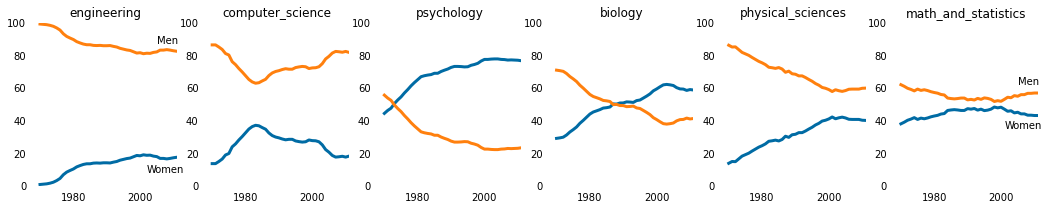

In [7]:
# To line plot the gender gap for each category of STEM degrees in women_degrees dataframe.

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['engineering', 'computer_science', 'psychology', 'biology', 'physical_sciences', 'math_and_statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    
    ax = fig.add_subplot( 1, 6, sp+1)
    
    ax.plot(women_degrees['year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params( bottom= False, top= False, left= False, right= False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
plt.show()

The gender gap reduces as we move across the graph. Engineering has the highest and math_and_statistics has the lowest gender gap in STEM degrees. The gender gap was negligible in psychology and as the year passed it has widened in favour of women. Engineering, Computer_science, Physical_sciences and Math_and_statistics have more men graduates in recent years. Psychology and Biology have more women graduates in recent years.

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way: 

In [8]:
# Grouping of various degrees into STEM, liberal arts and other.

stem_cats = ['psychology', 'biology', 'math_and_statistics', 'physical_sciences', 'computer_science', 'engineering']
lib_arts_cats = ['foreign_languages', 'english', 'communications_and_journalism', 'art_and_performance', 
                  'social_sciences_and_history']
other_cats = ['health_professions', 'public_administration', 'education', 'agriculture','business', 'architecture']

All three of these lists are ordered in descending order by the percentage of degrees awarded to women. You may have also noticed that while stem_cats and other_cats have six degree categories as elements, lib_arts_cats only has five.

**Let's visualize the gender gap in all degrees.**

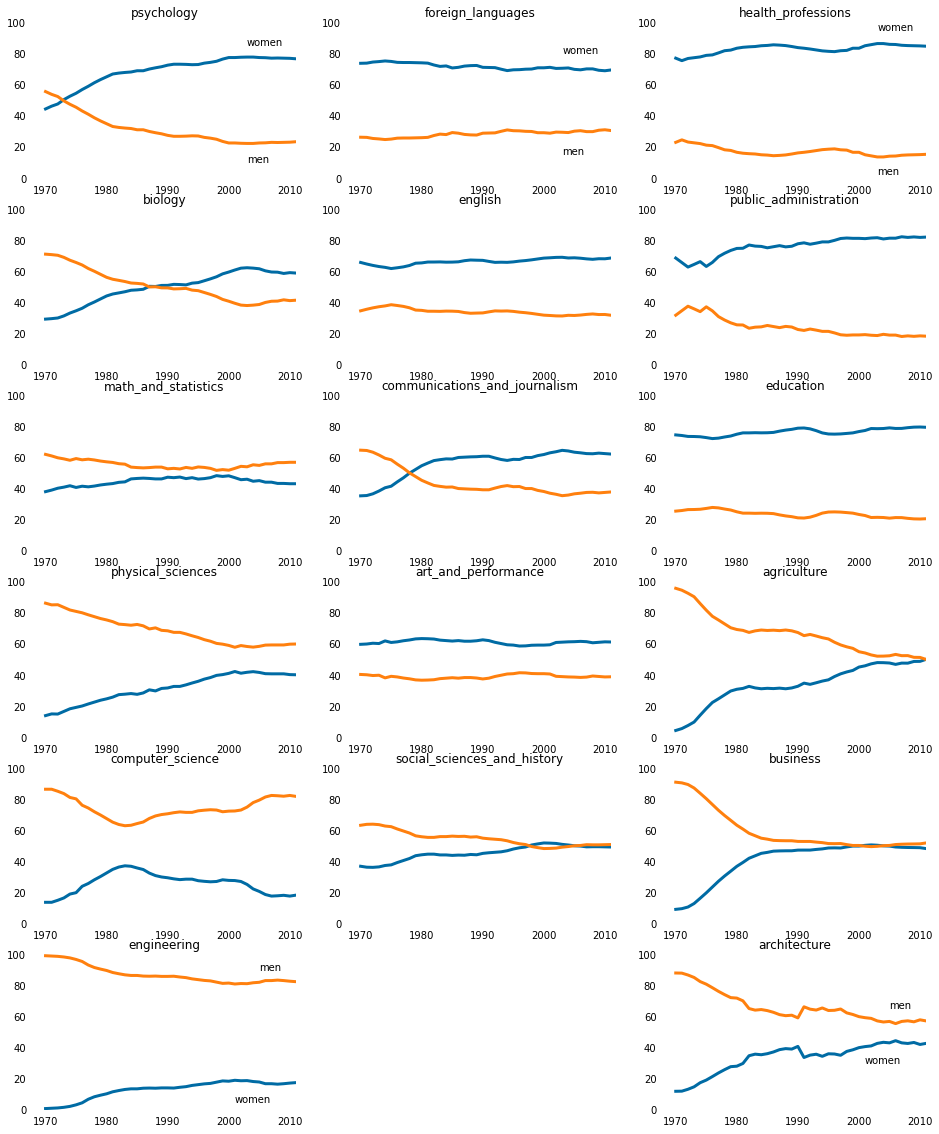

In [9]:
# To visualize the gender gap of STEM degrees.

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(16,20))

for sp in range(0,18,3):
    
    ax = fig.add_subplot(6, 3, sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    ax.tick_params( bottom= False, top= False, left= False, right= False)
    
    if sp == 0:
        ax.text(2003, 85, 'women')
        ax.text(2003, 10, 'men')
    elif sp == 15:
        ax.text(2005, 90, 'men')
        ax.text(2001, 5, 'women')

# To visualize the gender gap of liberal arts degrees.

for sp in range(1,14,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params( bottom= False, top= False, left= False, right= False)
    
    if sp == 1:
        ax.text(2003, 80, 'women')
        ax.text(2003, 15, 'men')

# To visualize the gender gap of other degrees.

for sp in range(2,18,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    ax.tick_params( bottom= False, top= False, left= False, right= False)
    
    if sp == 2:
        ax.text(2003, 95, 'women')
        ax.text(2003, 2, 'men')
    elif sp == 17:
        ax.text(2005, 65, 'men')
        ax.text(2001, 30, 'women')
        
plt.show()

With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to `Axes.tick_params()` and setting `labelbottom to off`.

**Let's hide x-axis labels.**

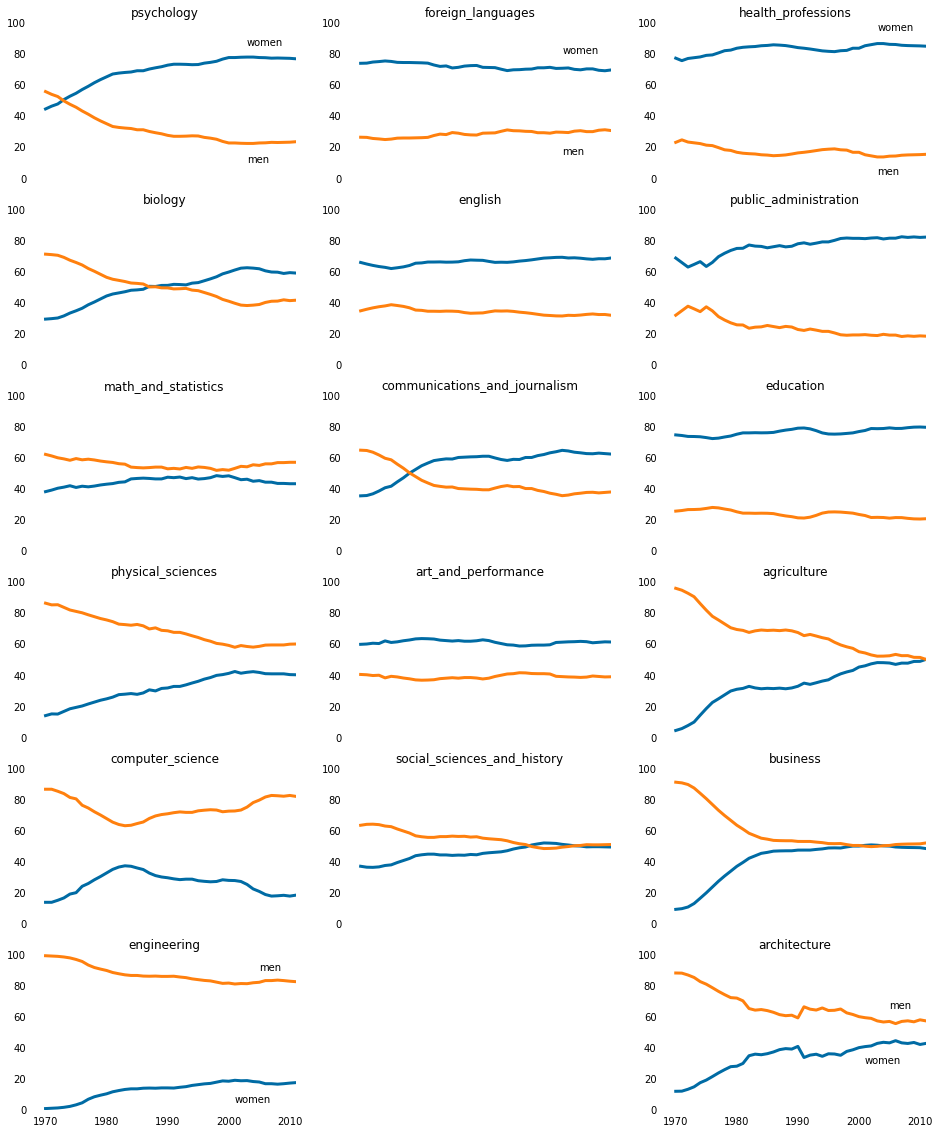

In [10]:
# To Hide x-axis labels.

# To visualize the gender gap of STEM degrees.

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(16,20))

for sp in range(0,18,3):
    
    ax = fig.add_subplot(6, 3, sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    
    if sp == 15:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 0:
        ax.text(2003, 85, 'women')
        ax.text(2003, 10, 'men')
    elif sp == 15:
        ax.text(2005, 90, 'men')
        ax.text(2001, 5, 'women')

# To visualize the gender gap of liberal arts degrees.

for sp in range(1,14,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 1:
        ax.text(2003, 80, 'women')
        ax.text(2003, 15, 'men')

# To visualize the gender gap of other degrees.

for sp in range(2,18,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    
    if sp == 17:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 2:
        ax.text(2003, 95, 'women')
        ax.text(2003, 2, 'men')
    elif sp == 17:
        ax.text(2005, 65, 'men')
        ax.text(2001, 30, 'women')
        
plt.show()

Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

We can use the `Axes.set_yticks()` method to specify which labels we want displayed.

**Let's simplify y-axis labels.**

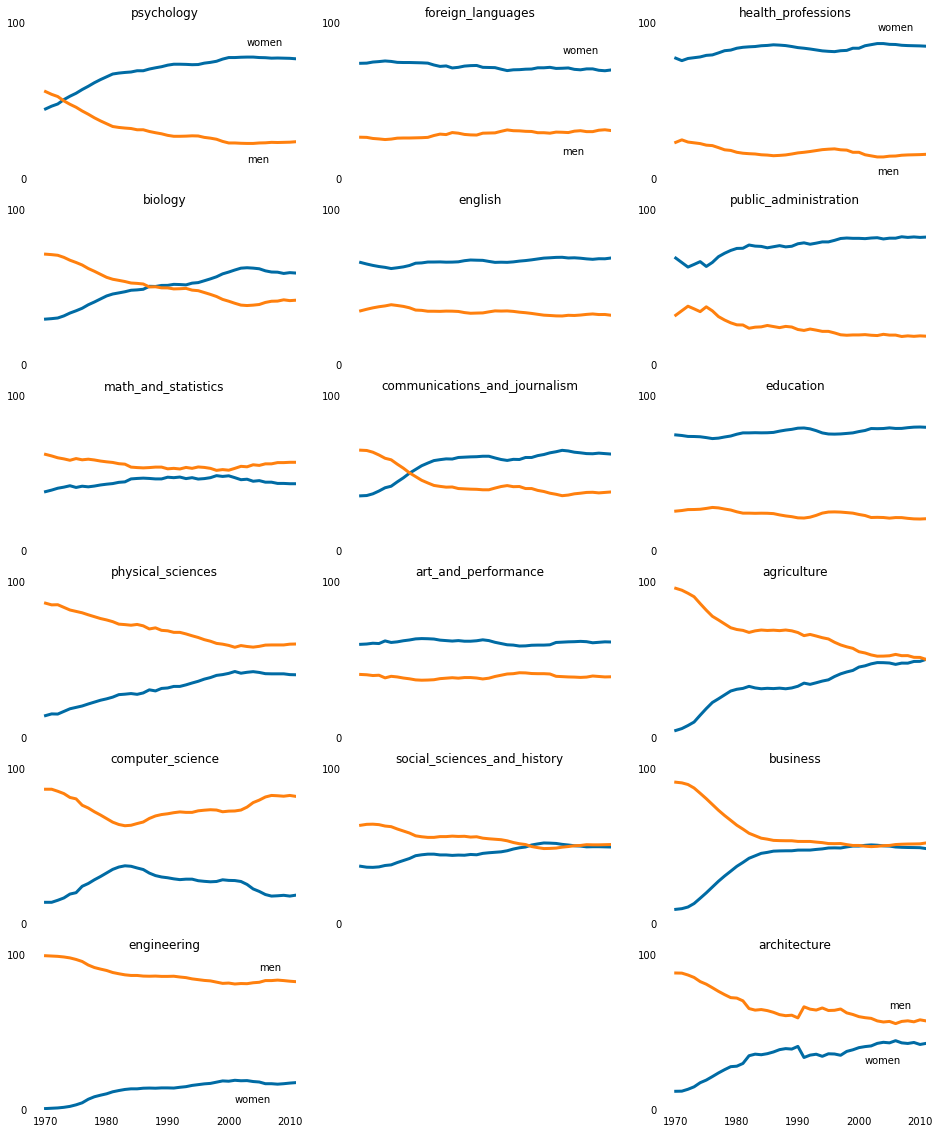

In [11]:
# To simplify y-axis labels.

# To visualize the gender gap of STEM degrees.

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(16,20))

for sp in range(0,18,3):
    
    ax = fig.add_subplot(6, 3, sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(stem_cats[index])
    
    if sp == 15:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 0:
        ax.text(2003, 85, 'women')
        ax.text(2003, 10, 'men')
    elif sp == 15:
        ax.text(2005, 90, 'men')
        ax.text(2001, 5, 'women')

# To visualize the gender gap of liberal arts degrees.

for sp in range(1,14,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[index])
    ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 1:
        ax.text(2003, 80, 'women')
        ax.text(2003, 15, 'men')

# To visualize the gender gap of other degrees.

for sp in range(2,18,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[index])
    
    if sp == 17:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 2:
        ax.text(2003, 95, 'women')
        ax.text(2003, 2, 'men')
    elif sp == 17:
        ax.text(2005, 65, 'men')
        ax.text(2001, 30, 'women')
        
plt.show()

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

We can generate a horizontal line across an entire subplot using the `Axes.axhline()` method.

Let's use the next color in the [Color Blind 10 palette](tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line.

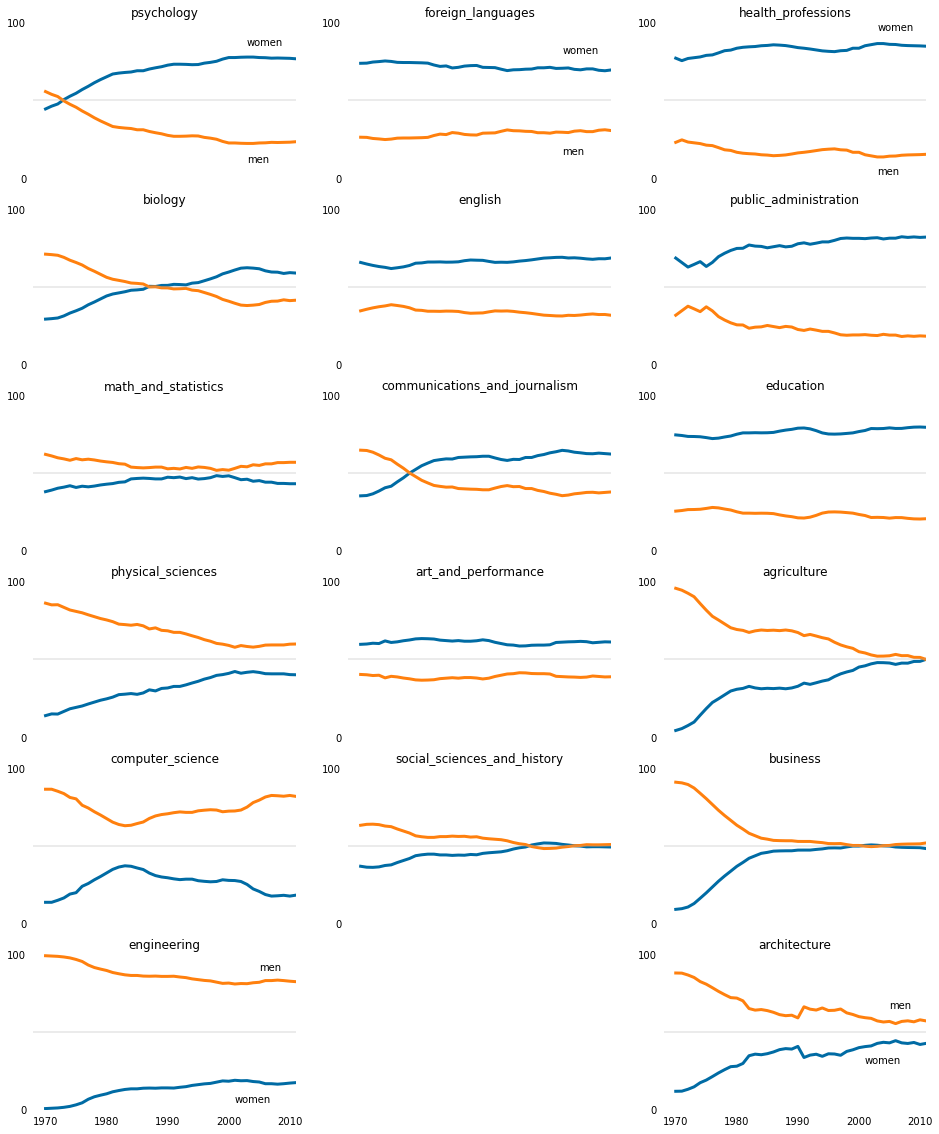

In [12]:
# To generate a horizontal line across the subplot for better visualization.

# To visualize the gender gap of STEM degrees.

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(16,20))

for sp in range(0,18,3):
    
    ax = fig.add_subplot(6, 3, sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(stem_cats[index])
    
    if sp == 15:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 0:
        ax.text(2003, 85, 'women')
        ax.text(2003, 10, 'men')
    elif sp == 15:
        ax.text(2005, 90, 'men')
        ax.text(2001, 5, 'women')

# To visualize the gender gap of liberal arts degrees.

for sp in range(1,14,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 1:
        ax.text(2003, 80, 'women')
        ax.text(2003, 15, 'men')

# To visualize the gender gap of other degrees.

for sp in range(2,18,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(other_cats[index])
    
    if sp == 17:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 2:
        ax.text(2003, 95, 'women')
        ax.text(2003, 2, 'men')
    elif sp == 17:
        ax.text(2005, 65, 'men')
        ax.text(2001, 30, 'women')
        
plt.show()

**Let's save the chart as `gender_degrees.png`.**

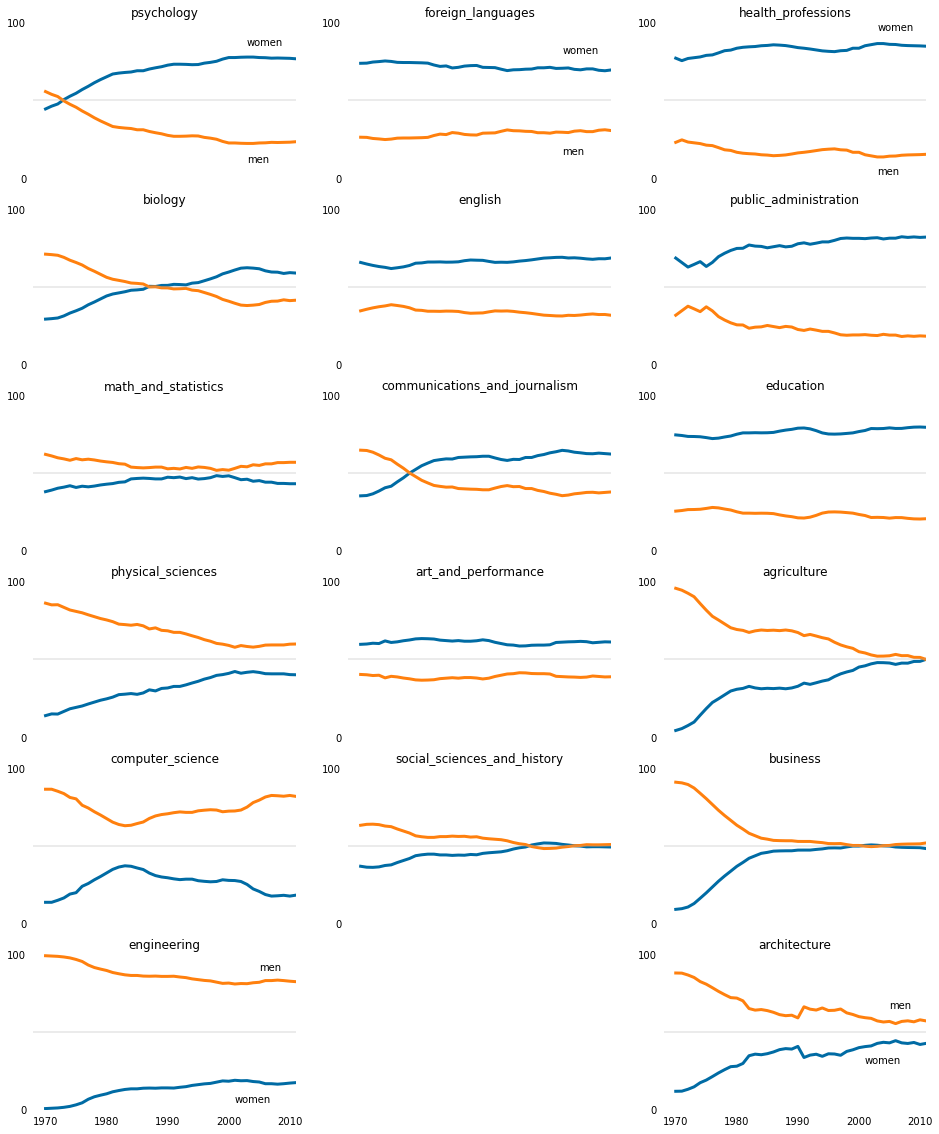

In [13]:
# To save the chart as gender_degrees.png

# To visualize the gender gap of STEM degrees.

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(16,20))

for sp in range(0,18,3):
    
    ax = fig.add_subplot(6, 3, sp+1)
    index = int(sp/3)
    ax.plot(women_degrees['year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(stem_cats[index])
    
    if sp == 15:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 0:
        ax.text(2003, 85, 'women')
        ax.text(2003, 10, 'men')
    elif sp == 15:
        ax.text(2005, 90, 'men')
        ax.text(2001, 5, 'women')

# To visualize the gender gap of liberal arts degrees.

for sp in range(1,14,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-1)/3)
    ax.plot(women_degrees['year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 1:
        ax.text(2003, 80, 'women')
        ax.text(2003, 15, 'men')

# To visualize the gender gap of other degrees.

for sp in range(2,18,3):
    
    ax = fig.add_subplot( 6, 3, sp+1)
    index = int((sp-2)/3)
    ax.plot(women_degrees['year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='women', linewidth=3)
    ax.plot(women_degrees['year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(other_cats[index])
    
    if sp == 17:
        ax.tick_params( bottom= False, top= False, left= False, right= False)
    else:
        ax.tick_params( bottom= False, top= False, left= False, right= False, labelbottom= False)
    
    if sp == 2:
        ax.text(2003, 95, 'women')
        ax.text(2003, 2, 'men')
    elif sp == 17:
        ax.text(2005, 65, 'men')
        ax.text(2001, 30, 'women')
        

plt.savefig('gender_degrees.png')
plt.show()

## Conclusion

The growing gender gap in various college degrees over the past 5 decades has been successfully visualized. 